     Country Age group    Value
0   Viet Nam     15-19   94.496
1   Viet Nam     20-24  244.343
2   Viet Nam     25-29  161.619
3   Viet Nam     30-34  110.208
4   Viet Nam     35-39   72.444
5   Viet Nam     40-44   51.641
6   Viet Nam     45-49   42.925
7   Viet Nam     50-54   39.172
8   Viet Nam     55-59   26.084
9   Viet Nam     60-64    6.739
10  Viet Nam       65+    2.098
Trung bình: 77.43354545454544
Độ lệch chuẩn: 72.77782939791985


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


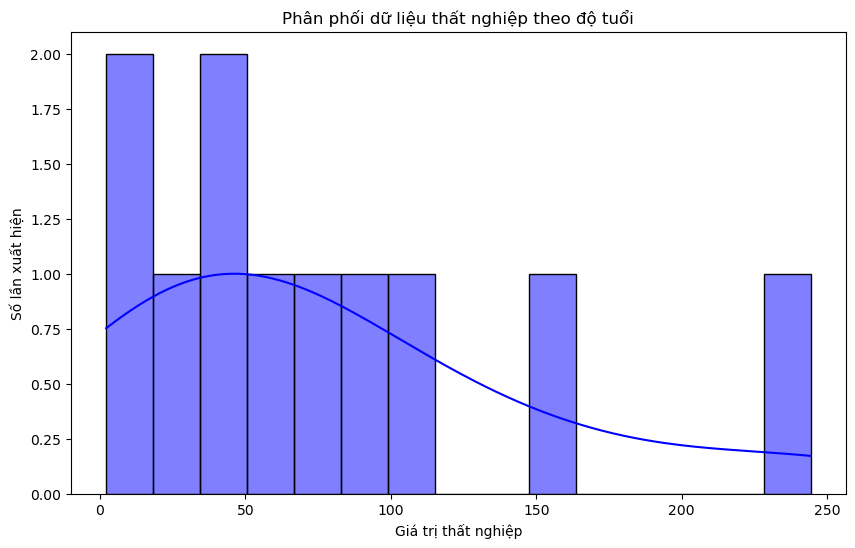

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Đường dẫn đến file CSV
file_path = 'TyLeTNtheoTuoi.csv'

# Đọc file CSV và lưu vào một DataFrame
df = pd.read_csv(file_path)
df = df.rename(columns={'ref_area.label': 'Country', 'sex.label': 'Sex', 'classif1.label': 'Age group', 'obs_value': 'Value'})
col = ['indicator.label', 'time', 'source.label', 'obs_status.label', 'note_classif.label', 'note_indicator.label', 'note_source.label','classif2.label' ]
df.drop(columns=col, inplace=True)
df = df[(df['Sex'] == 'Sex: Total')]
col = ['Sex' ]
df.drop(columns=col, inplace=True)
mapping_dict = {
    'Age (5-year bands): 15-19': '15-19',
    'Age (5-year bands): 20-24': '20-24',
    'Age (5-year bands): 25-29': '25-29',
    'Age (5-year bands): 30-34': '30-34',
    'Age (5-year bands): 35-39': '35-39',
    'Age (5-year bands): 40-44': '40-44',
    'Age (5-year bands): 45-49': '45-49',
    'Age (5-year bands): 50-54': '50-54',
    'Age (5-year bands): 55-59': '55-59',
    'Age (5-year bands): 60-64': '60-64',
    'Age (5-year bands): 65+': '65+'
}
df.replace(mapping_dict, inplace=True)

# Hiển thị nội dung của DataFrame
print(df)
df.to_csv('TyleTNtheoTuoidaxuly.csv', encoding='utf-8', index=False, header=True)
df1 = pd.DataFrame(df, columns=['Value'])
trung_binh = df1['Value'].mean()
print(f"Trung bình: {trung_binh}")
do_lech_chuan = df['Value'].std()
print(f"Độ lệch chuẩn: {do_lech_chuan}")

# Vẽ biểu đồ phân phối dữ liệu
plt.figure(figsize=(10, 6))

# Sử dụng Seaborn để vẽ biểu đồ histogram với KDE
sns.histplot(df['Value'], kde=True, bins=15, color='blue')

# Thêm tiêu đề và nhãn trục
plt.title('Phân phối dữ liệu thất nghiệp theo độ tuổi')
plt.xlabel('Giá trị thất nghiệp')
plt.ylabel('Số lần xuất hiện')

# Hiển thị biểu đồ
plt.show()